In [3]:
import pandas as pd
import numpy as np

In [32]:
df= pd.read_csv('arquivo2.csv', sep ='\t')

In [33]:
df.head()
#Como não conseguir usar a planilhar criei um nova só com o dados

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2,67.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Agora vamos apagar todas a colunas com valores vazios, isso é util pq sabemos que todas as colunas que vamos usar não possui valores vazios

In [34]:
df.isna().sum()

land_area          0
percent_city       0
percent_senior     0
physicians         0
hospital_beds      0
graduates          0
work_force         0
income             0
region             0
crime_rate         0
Unnamed: 10       99
Unnamed: 11       99
Unnamed: 12       99
Unnamed: 13       99
Unnamed: 14       99
Unnamed: 15       99
Unnamed: 16       99
Unnamed: 17       99
Unnamed: 18       99
Unnamed: 19       99
Unnamed: 20       99
Unnamed: 21       99
dtype: int64

Vieram algumas colunas indesejadas para não atrapalhar o nosso modelo,vamos excluir

In [35]:
df.dropna(axis=1, inplace=True)

In [36]:
df.isna().sum()
#Bem melhor agora

land_area         0
percent_city      0
percent_senior    0
physicians        0
hospital_beds     0
graduates         0
work_force        0
income            0
region            0
crime_rate        0
dtype: int64

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#Antes de tudo vamos olhar nosso dados

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   land_area       99 non-null     int64  
 1   percent_city    99 non-null     float64
 2   percent_senior  99 non-null     float64
 3   physicians      99 non-null     int64  
 4   hospital_beds   99 non-null     int64  
 5   graduates       99 non-null     float64
 6   work_force      99 non-null     float64
 7   income          99 non-null     int64  
 8   region          99 non-null     int64  
 9   crime_rate      99 non-null     float64
dtypes: float64(5), int64(5)
memory usage: 7.9 KB


In [49]:
df.corr()
#A correlação entre nossas variaveis

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
land_area,1.000000,-0.077320,0.092226,0.085054,0.081034,0.088728,0.135792,0.111404,0.292392,0.293907
percent_city,-0.077320,1.000000,-0.250995,0.067391,0.052898,0.076720,0.016011,0.019235,0.235880,0.159596
percent_senior,0.092226,-0.250995,1.000000,0.056454,0.083775,-0.155695,0.035240,0.046073,-0.242811,-0.177992
physicians,0.085054,0.067391,0.056454,1.000000,0.974241,0.049500,0.965597,0.976209,-0.140961,0.187763
hospital_beds,0.081034,0.052898,0.083775,0.974241,1.000000,-0.003892,0.967913,0.974416,-0.220305,0.109799
graduates,0.088728,0.076720,-0.155695,0.049500,-0.003892,1.000000,0.044054,0.045578,0.246226,0.290880
work_force,0.135792,0.016011,0.035240,0.965597,0.967913,0.044054,1.000000,0.996735,-0.144022,0.175945
income,0.111404,0.019235,0.046073,0.976209,0.974416,0.045578,0.996735,1.000000,-0.152016,0.175797
region,0.292392,0.235880,-0.242811,-0.140961,-0.220305,0.246226,-0.144022,-0.152016,1.000000,0.636192
crime_rate,0.293907,0.159596,-0.177992,0.187763,0.109799,0.290880,0.175945,0.175797,0.636192,1.000000


In [48]:
df.region.unique()
#Quantidade regioes do nosso dataset
print(f'Quantidade de regioes do nosso dataset:{len(df.region.unique())}')

Quantidade regioes do nosso dataset:4


# Pronto agora vamos criar um modelo de machine learning que consiga prever a taxa de criminalide de uma região com base nas nossas variaveis

In [50]:
#Primeiros escolhemos nosso target e as nossas variavel/features

features = ['land_area','percent_city','percent_senior','physicians','hospital_beds','graduates','work_force','income','region']
target = df.crime_rate

In [53]:
X= df[features]
y = target

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
#Separando os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
model = DecisionTreeRegressor(random_state = 42)

In [58]:
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

# Primeiro vamos ver o resultado do nosso modelos, ou seja as previsões feitas e depois vamos ver a precisão, e por fim se possivel o caminho que ele tomou para suas escolhas

In [60]:
print("Previsoes paras seguintes áreas")
print(X.head())

Previsoes paras seguintes áreas
   land_area  percent_city  percent_senior  physicians  hospital_beds  \
0       1384          78.1            12.3       25627          69678   
1       3719          43.9             9.4       13326          43292   
2       3553          37.4            10.7        9724          33731   
3       3916          29.9             8.8        6402          24167   
4       2480          31.5            10.5        8502          16751   

   graduates  work_force  income  region  
0       50.1      4083.9   72100       1  
1       53.9      3305.9   54542       2  
2       50.6      2066.3   33216       1  
3       52.2      1966.7   32906       2  
4       66.1      1514.5   26573       4  


In [65]:
print("Previsões feitas")
print(model.predict(X.head()))
y_pred = model.predict(X)

Previsões feitas
[28.52 56.03 41.32 67.38 77.94]


In [66]:
from sklearn.metrics import mean_squared_error
# y_true são os valores reais, y_pred são as previsões do modelo
mse = mean_squared_error(y, y_pred)
mse

55.332268686868694

# Temos um coeficiente de 55.3 , que depedendo do contexto que está inserido pode ser um bom modelo, vamos ver se podemos melhorar isso.

In [68]:
model_melhorado = DecisionTreeRegressor(max_depth = 3)

In [69]:
model_melhorado.fit(X,y)

DecisionTreeRegressor(max_depth=3)

In [70]:
print("Previsoes paras seguintes áreas do modelo melhorado")
print(X.head())

Previsoes paras seguintes áreas do modelo melhorado
   land_area  percent_city  percent_senior  physicians  hospital_beds  \
0       1384          78.1            12.3       25627          69678   
1       3719          43.9             9.4       13326          43292   
2       3553          37.4            10.7        9724          33731   
3       3916          29.9             8.8        6402          24167   
4       2480          31.5            10.5        8502          16751   

   graduates  work_force  income  region  
0       50.1      4083.9   72100       1  
1       53.9      3305.9   54542       2  
2       50.6      2066.3   33216       1  
3       52.2      1966.7   32906       2  
4       66.1      1514.5   26573       4  


In [72]:
print("Previsões feitas")
print(model_melhorado.predict(X.head()))
y_pred = model_melhorado.predict(X)

Previsões feitas
[75.55       54.16043478 44.55333333 63.70266667 64.24727273]


In [73]:
from sklearn.metrics import mean_squared_error
# y_true são os valores reais, y_pred são as previsões do modelo
mse = mean_squared_error(y, y_pred)
mse

62.99750972063948

# No fim diminuir a quantidade de caminhos que o nosso modelo pode tomar não melhorou sua previsão muito pelo contrario a tornou pior

In [75]:
from sklearn import tree
import graphviz

model.fit(X, y)  # Substitua X e y pelos seus próprios dados

# Visualize a árvore de decisão
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=X.columns,  # Substitua pelas suas colunas de recursos
                                filled=True, rounded=True,  
                                special_characters=True) 

graph = graphviz.Source(dot_data)

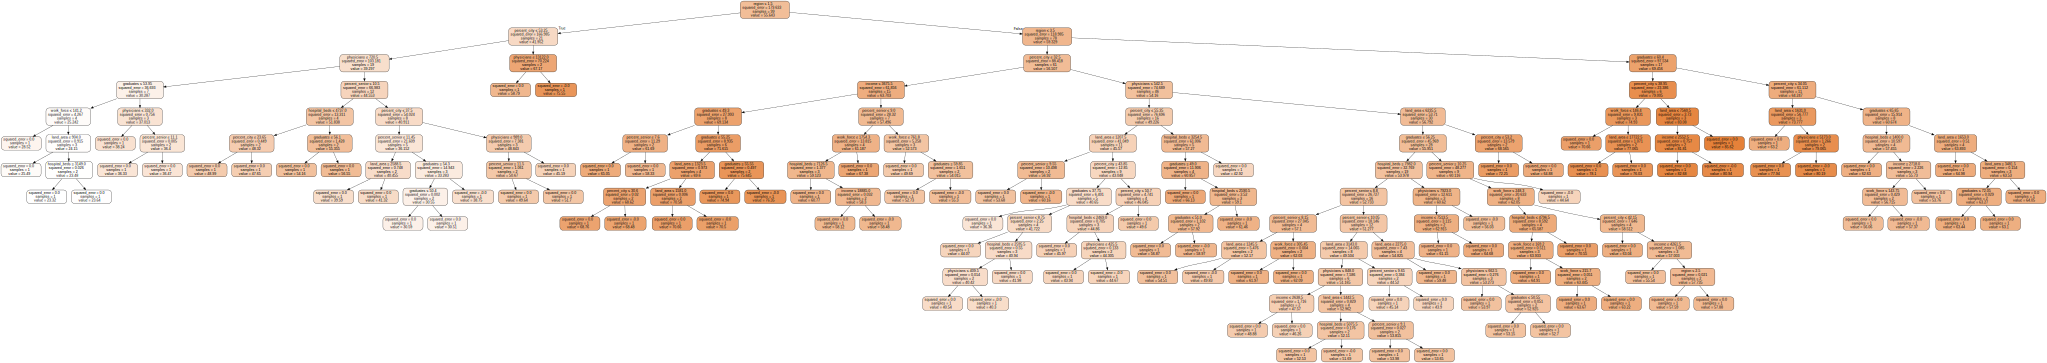

In [76]:
graph

# Com isso podemos ver que a principal feature usar para tomar de decisão do nosso modelo foi a região, o que faz muito sentido, até meio obvio talvez, e depois o percent_city

Com isso finalizo esse modelo!